<a href="https://colab.research.google.com/github/rarian1995/A01795124_A4.2/blob/main/Actividad_3_1_Detecci%C3%B3n_de_Peatones_Equipo25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Detección de Peatones Usando HOG y SVM


### Equipo 25
Arian Yolanda Reyes Aguilar (A01795124)

David Alejandro Gutierrez Valencia 	(A01027771)

Yamil Abraham Nechar Reyes 		(A01795726)


##  Carga de Bibliotecas

In [39]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from skimage.feature import hog
import glob
import random
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

## Importación de Datasets

In [2]:
# CAMBIO: Se adaptan las rutas para la detección de peatones
import glob
positive = glob.glob(r"/content/drive/MyDrive/Datasets/INRIAPerson/positive/**/*.png", recursive=True)
negative = glob.glob(r"/content/drive/MyDrive/Datasets/INRIAPerson/negative/**/*.png", recursive=True)

# CAMBIO: Se renombran las variables para reflejar que se trabaja con peatones
pedestrian = positive
no_pedestrian = negative


## Verificación de Cantidad de Imágenes

In [3]:
len(pedestrian)

614

In [4]:
len(no_pedestrian)

912

## Visualización de una Imagen de Peaton

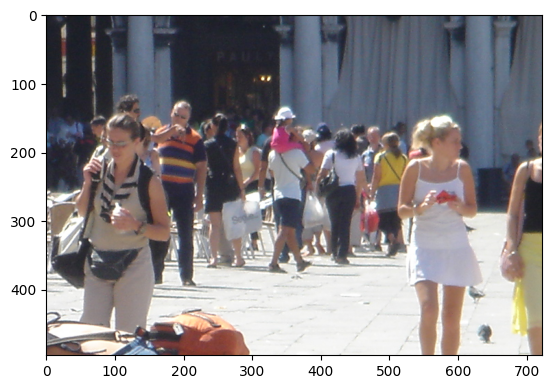

In [5]:
img_color = cv2.imread(pedestrian[10])
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
plt.imshow(img_color)

##  Cálculo de Descriptores HOG

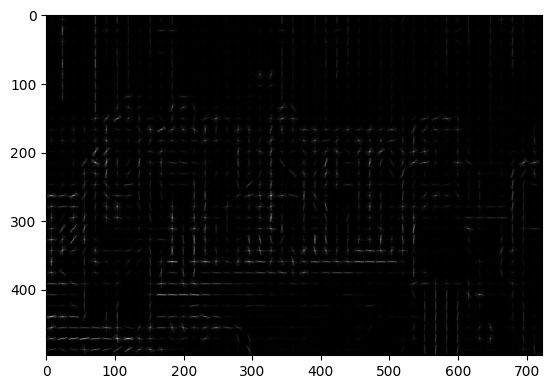

In [6]:
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray")
features, hog_img = hog(
    img_gray,
    orientations=11,
    pixels_per_cell=(16, 16),
    cells_per_block=(2, 2),
    transform_sqrt=False,
    visualize=True,
    feature_vector=True
)
plt.imshow(hog_img, cmap="gray")

##  Extracción de HOG Features para Imágenes de Peatones

In [7]:
pedestrian_hog_accum = []

for i in pedestrian:
    img_color = mpimg.imread(i)
    target_size = (64, 128)  # Mantener el mismo tamaño que en las imágenes de peatones
    img_resized = cv2.resize(img_color, target_size)  # Redimensionar la imagen
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    pedestrian_hog_feature, _ = hog(
        img_gray,
        orientations=11,
        pixels_per_cell=(16, 16),
        cells_per_block=(2, 2),
        transform_sqrt=False,
        visualize=True,
        feature_vector=True
    )
    pedestrian_hog_accum.append(pedestrian_hog_feature)

X_pedestrian = np.vstack(pedestrian_hog_accum).astype(np.float64)
y_pedestrian = np.ones(len(X_pedestrian))


## Extracción de HOG Features para Imágenes de No Peatones

In [8]:
nopedestrian_hog_accum = []
target_size = (64, 128)  # Mantener el mismo tamaño que en las imágenes de peatones

for i in no_pedestrian:
    img_color = mpimg.imread(i)
    img_resized = cv2.resize(img_color, target_size)  # Redimensionar la imagen
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    nopedestrian_hog_feature, _ = hog(
        img_gray,
        orientations=11,
        pixels_per_cell=(16, 16),
        cells_per_block=(2, 2),
        transform_sqrt=False,
        visualize=True,
        feature_vector=True
    )
    nopedestrian_hog_accum.append(nopedestrian_hog_feature)

X_nopedestrian = np.vstack(nopedestrian_hog_accum).astype(np.float64)
y_nopedestrian = np.zeros(len(X_nopedestrian))

## Combinación de Datos para Entrenamiento

In [9]:
X = np.vstack((X_pedestrian, X_nopedestrian))
y = np.hstack((y_pedestrian, y_nopedestrian))

##  División en Datos de Entrenamiento y Prueba

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Entrenamiento del Clasificador SVM

In [40]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

##  Evaluación del Modelo

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88       186
         1.0       0.82      0.82      0.82       120

    accuracy                           0.86       306
   macro avg       0.85      0.85      0.85       306
weighted avg       0.86      0.86      0.86       306



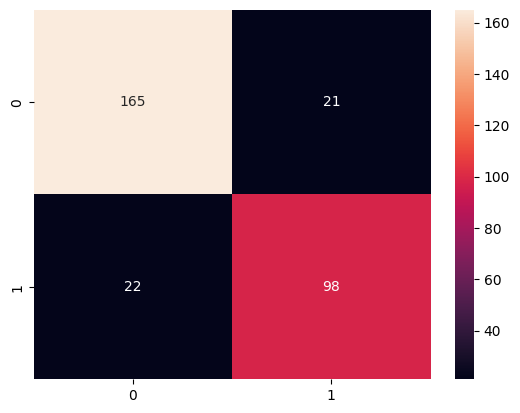

In [41]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, y_predict))

##  Optimización de Hiperparámetros con GridSearchCV

In [49]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf'],
    'gamma': [0.01, 0.05, 0.1, 'scale', 0.2],
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.594 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.594 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.594 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.594 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.598 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.05, kernel=rbf;, score=0.615 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.05, kernel=rbf;, score=0.615 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=0.05, kernel=rbf;, score=0.607 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=0.05, kernel=rbf;, score=0.598 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=0.05, kernel=rbf;, score=0.602 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.717 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       186
         1.0       0.85      0.88      0.86       120

    accuracy                           0.89       306
   macro avg       0.88      0.89      0.88       306
weighted avg       0.89      0.89      0.89       306



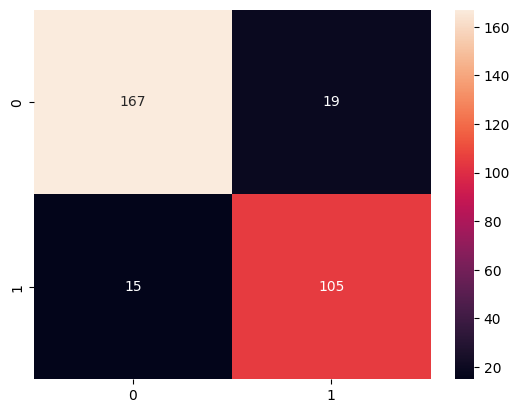

In [50]:
# Crear matriz de confusion
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, grid_predictions))

## Predecir imagen aleatoria

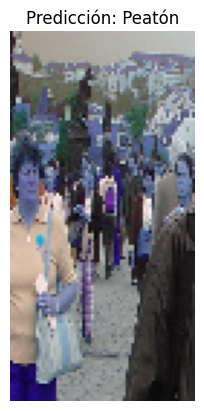

'Peatón'

In [81]:
# Función de predicción de imagen aleatoria
def predecir_imagen_random(svc_model, X_test, y_test, avg_size=(64, 128)):
    """
    Predice si una imagen seleccionada aleatoriamente de las imágenes en X_test
    contiene un peatón o no, utilizando el modelo entrenado.

    Parámetros:
    - svc_model: Modelo entrenado (SVC).
    - X_test: Características extraídas de las imágenes de prueba.
    - y_test: Etiquetas de las imágenes de prueba.
    - avg_size: Tamaño al que se redimensiona la imagen antes de extraer las características HOG.

    Retorna:
    - 'Peatón' o 'No peatón' según la predicción.
    """
    # Seleccionar aleatoriamente una imagen de las características de X_test
    random_index = random.randint(0, len(X_test) - 1)
    selected_feature = X_test[random_index]
    actual_label = y_test[random_index]

    # Cargar la imagen correspondiente a la característica seleccionada
    selected_image_path = positive[random_index] if actual_label == 1 else negative[random_index]
    img_color = mpimg.imread(selected_image_path)

    # Redimensionar la imagen para mostrarla (si se encuentra)
    resized_img = cv2.resize(img_color, avg_size)

    # Realizar la predicción usando el modelo entrenado
    pred = svc_model.predict([selected_feature])[0]

    # Determinar la clase predicha
    resultado = "Peatón" if pred == 1 else "No Peatón"

    # Mostrar la imagen
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicción: {resultado}")
    plt.axis('off')
    plt.show()

    return resultado

# Probar la función de predicción de imagen aleatoria
predecir_imagen_random(svc_model, X_test, y_test)